**Лабораторная работа №2. Вариант 5**

Подключение библиотек и задание параметров.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

Чтение изображения из файла.

In [2]:
image = plt.imread("Bobyor.jpg").copy()

Вывод изображения.

In [3]:
def show_image(ax, image, title=None, cmap=None):

    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

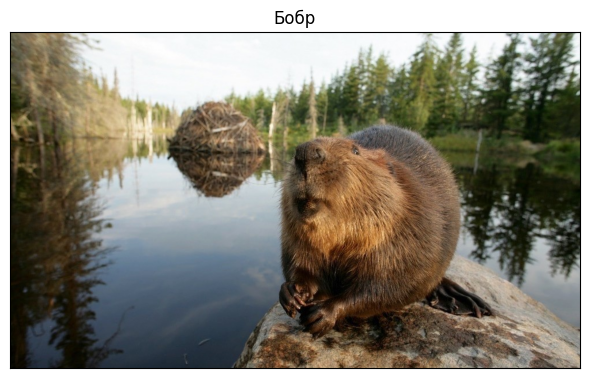

In [4]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image, title="Бобр", cmap="gray")

Размытие по Гауссу (Gaussian).

In [5]:
def get_gaussian(img, sig):
    size = img.shape
    res = np.zeros(size, dtype=float)

    midx, midy = (size[0]//2, size[1]//2)
    for i in range(size[0]):
        for j in range(size[1]):
            x = i - midx
            y = j - midy
            res[i][j] = math.exp(- ((x ** 2 + y ** 2) / (2 * sig ** 2))) / (2 * math.pi * sig ** 2)

    return res


In [6]:
sigma = 3
gaussian = get_gaussian(image, 1)

Применение лапласиана к гауссиану (LoG фильтр).

In [7]:
def get_laplasian(img):
    size = img.shape
    img = img.astype(np.int64)
    res = img.copy()

    for k in range(size[2]):
        for i in range(1, size[0] - 1):
            for j in range(1, size[1] - 1):
                res[i][j][k] = - img[i + 1][j][k] - img[i - 1][j][k] - img[i][j + 1][k] - img[i][j - 1][k] + 4 * img[i][j][k]

    return res

In [8]:
LoG = get_laplasian(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


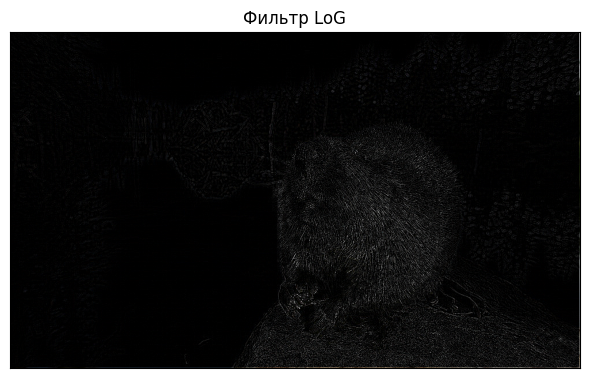

In [9]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, LoG, title="Фильтр LoG", cmap="gray")

Сложение с исходным изображением.

In [10]:
def get_image_sum(image1, image2):
    size = image1.shape
    image1 = image1.astype(np.int64)
    res = image1.copy()

    for i in range(size[0]):
        for j in range(size[1]):
            for k in range(size[2]):
                sum = image1[i][j][k] + image2[i][j][k]
                res[i][j][k] = min(sum, 255)

    return res 

In [11]:
image_sum = get_image_sum(image, LoG)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


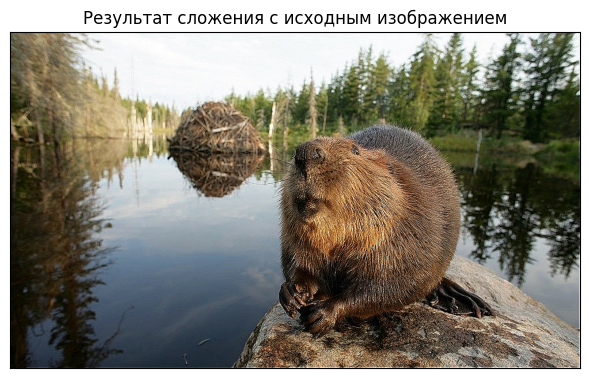

In [12]:
fig, ax = plt.subplots(figsize=(6, 6), layout="tight")
show_image(ax, image_sum, title="Результат сложения с исходным изображением", cmap="gray")